# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#lists to store data
city_name = []
max_temp = []
humid = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lon = []
counter = 0
set_count = 1

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"]) 
        max_temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        if counter > 49:
            counter = 0
            set_count = set_count + 1
    
        else:
            counter = counter + 1
            
        print(f"Processing Record {counter} of Set {set_count} : {city}") 
    except (KeyError, IndexError):
        print("City not found. Skipping. . . ")
        
        counter = counter + 1
        



Processing Record 1 of Set 1 : muscat
Processing Record 2 of Set 1 : avarua
Processing Record 3 of Set 1 : hervey bay
Processing Record 4 of Set 1 : thompson
Processing Record 5 of Set 1 : hilo
Processing Record 6 of Set 1 : ponta do sol
Processing Record 7 of Set 1 : mataura
Processing Record 8 of Set 1 : rikitea
Processing Record 9 of Set 1 : port blair
Processing Record 10 of Set 1 : richards bay
Processing Record 11 of Set 1 : sorland
Processing Record 12 of Set 1 : katsuura
Processing Record 13 of Set 1 : eucaliptus
Processing Record 14 of Set 1 : tubuala
Processing Record 15 of Set 1 : lakatoro
Processing Record 16 of Set 1 : nador
Processing Record 17 of Set 1 : lagoa
Processing Record 18 of Set 1 : anloga
Processing Record 19 of Set 1 : bluff
Processing Record 20 of Set 1 : krasnogorskiy
Processing Record 21 of Set 1 : pangnirtung
Processing Record 22 of Set 1 : byron bay
Processing Record 23 of Set 1 : shu
Processing Record 24 of Set 1 : salisbury
Processing Record 25 of Set 1

Processing Record 2 of Set 5 : isangel
Processing Record 3 of Set 5 : ancud
Processing Record 4 of Set 5 : esperance
Processing Record 5 of Set 5 : provideniya
Processing Record 6 of Set 5 : ratnapura
Processing Record 7 of Set 5 : malakal
Processing Record 8 of Set 5 : prata
Processing Record 9 of Set 5 : yellowknife
Processing Record 10 of Set 5 : lubango
Processing Record 11 of Set 5 : yulara
Processing Record 12 of Set 5 : salalah
Processing Record 13 of Set 5 : opuwo
Processing Record 14 of Set 5 : hermanus
Processing Record 15 of Set 5 : haradok
Processing Record 16 of Set 5 : taiyuan
Processing Record 17 of Set 5 : kibala
Processing Record 18 of Set 5 : asosa
Processing Record 19 of Set 5 : okoneshnikovo
Processing Record 20 of Set 5 : goderich
Processing Record 21 of Set 5 : alihe
City not found. Skipping. . . 
Processing Record 23 of Set 5 : leningradskiy
Processing Record 24 of Set 5 : adrar
City not found. Skipping. . . 
Processing Record 26 of Set 5 : constitucion
Processin

Processing Record 1 of Set 9 : port hardy
Processing Record 2 of Set 9 : eureka
Processing Record 3 of Set 9 : abu kamal
Processing Record 4 of Set 9 : san jeronimo
Processing Record 5 of Set 9 : canavieiras
City not found. Skipping. . . 
Processing Record 7 of Set 9 : cuamba
City not found. Skipping. . . 
Processing Record 9 of Set 9 : loa janan
Processing Record 10 of Set 9 : quatre cocos
Processing Record 11 of Set 9 : cherskiy
Processing Record 12 of Set 9 : morgan city
Processing Record 13 of Set 9 : yanaul
Processing Record 14 of Set 9 : kota kinabalu
Processing Record 15 of Set 9 : rundu
Processing Record 16 of Set 9 : abha
Processing Record 17 of Set 9 : phalaborwa
Processing Record 18 of Set 9 : santa vitoria do palmar
Processing Record 19 of Set 9 : okhotsk
Processing Record 20 of Set 9 : mwingi
Processing Record 21 of Set 9 : gorontalo
Processing Record 22 of Set 9 : umba
Processing Record 23 of Set 9 : chernyshevskiy
Processing Record 24 of Set 9 : cabedelo
Processing Recor

Processing Record 50 of Set 12 : rosarito
Processing Record 0 of Set 13 : la ronge
Processing Record 1 of Set 13 : aktau
Processing Record 2 of Set 13 : shelburne
Processing Record 3 of Set 13 : barra patuca
Processing Record 4 of Set 13 : mubi
City not found. Skipping. . . 
Processing Record 6 of Set 13 : marienburg
Processing Record 7 of Set 13 : stephenville
Processing Record 8 of Set 13 : livingstonia
Processing Record 9 of Set 13 : groningen
Processing Record 10 of Set 13 : along
Processing Record 11 of Set 13 : yiyang
Processing Record 12 of Set 13 : assiniboia
Processing Record 13 of Set 13 : ajaccio
Processing Record 14 of Set 13 : veraval
Processing Record 15 of Set 13 : booue
Processing Record 16 of Set 13 : ojinaga
Processing Record 17 of Set 13 : buin
City not found. Skipping. . . 
City not found. Skipping. . . 
Processing Record 20 of Set 13 : kaabong
Processing Record 21 of Set 13 : mundo nuevo
Processing Record 22 of Set 13 : guerrero negro
Processing Record 23 of Set 13

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [7]:
weather_df = pd.DataFrame({'City': city_name,'Lat': lat, 'Lon':lon, 'Max Temp': max_temp,
                   'Humidity': humid, 'Cloudiness' : cloudiness, 'Wind Speed': wind_speed,
                          'Country': country, 'Date' : date})
#df.to_csv(index=False)

weather_df.to_csv("output_data/cities2.csv", index=False)
weather_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muscat,23.6139,58.5922,62.60,77,20,4.61,OM,1612496929
1,Avarua,-21.2078,-159.7750,84.20,70,20,4.61,CK,1612496904
2,Hervey Bay,-25.2986,152.8535,84.99,57,64,5.99,AU,1612497112
3,Thompson,55.7435,-97.8558,-11.20,77,90,8.05,CA,1612497072
4,Hilo,19.7297,-155.0900,71.60,73,75,16.11,US,1612496910


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [8]:
weather_df["City"].unique()

array(['Muscat', 'Avarua', 'Hervey Bay', 'Thompson', 'Hilo',
       'Ponta do Sol', 'Mataura', 'Rikitea', 'Port Blair', 'Richards Bay',
       'Sørland', 'Katsuura', 'Eucaliptus', 'Tubualá', 'Lakatoro',
       'Nador', 'Lagoa', 'Anloga', 'Bluff', 'Krasnogorskiy',
       'Pangnirtung', 'Byron Bay', 'Chu', 'Salisbury', 'Ilulissat',
       'Haines Junction', 'Maceió', 'Hobart', 'Porto Velho',
       'Tuktoyaktuk', 'Jamestown', 'Puerto Ayacucho', 'Bani Walid',
       'Union', 'Guînes', 'Nabire', 'Basco', 'Hong Kong',
       'Havre-St-Pierre', 'Kruisfontein', 'Nerchinskiy Zavod', 'Xining',
       'Dvinskoy Bereznik', 'Saskylakh', 'George Town', 'Kapaa',
       'Moose Factory', "Severo-Kuril'sk", 'Nizwá', 'Aksu', 'Ushuaia',
       'Kawalu', 'Horki', 'Longyearbyen', 'Biak', 'Dikson',
       'Todos Santos', 'Pochutla', 'Klaksvík', 'Ahipara', 'Albany',
       'Ribeira Grande', 'Nome', 'Noumea', 'Bathsheba', 'Chui', 'Vaitape',
       'Bredasdorp', 'Zeya', 'Cayenne', 'Hithadhoo', 'Busselton',
   

In [9]:
#describe function found on pandas.pydata.org


weather_df.describe()



,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,19.191885,17.970472,50.327242,73.571912,53.175973,7.805939,1.612497e+09
std,33.833535,90.224717,31.152964,19.350325,39.737394,5.860316,8.980238e+01
min,-54.800000,-179.166700,-41.800000,9.000000,0.000000,0.200000,1.612497e+09
25%,-9.732900,-58.693500,33.115000,64.000000,8.000000,3.420000,1.612497e+09
50%,22.285500,20.040300,60.800000,78.000000,64.000000,6.460000,1.612497e+09
75%,49.616700,99.485100,75.075000,88.000000,92.500000,10.770000,1.612497e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,35.750000,1.612497e+09


In [23]:
weather_df.loc[weather_df["Humidity"] > 100]


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [27]:
#  Get the indices of cities that have humidity over 100%.

humid_cities = weather_df.loc[weather_df["Humidity"] > 100].index


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

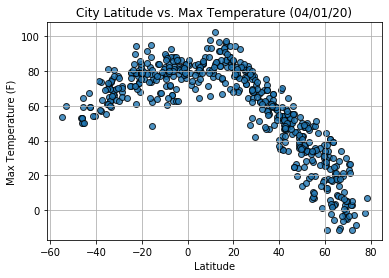

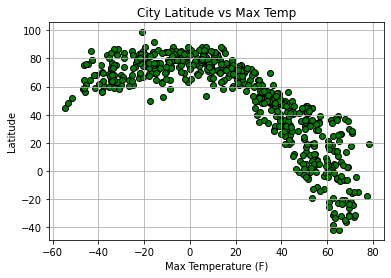

In [15]:
plt.scatter(lat, max_temp, facecolors="green", edgecolors="black")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("City Latitude vs Max Temp")
plt.grid()


plt.show()

## Latitude vs. Humidity Plot

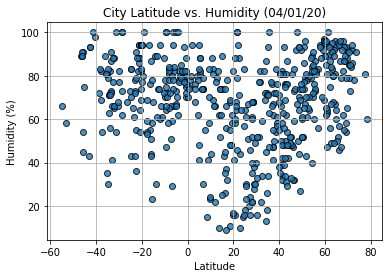

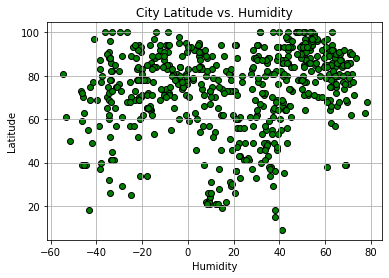

In [16]:
plt.scatter(lat,humid, facecolors="green", edgecolors = "black")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("City Latitude vs. Humidity")
plt.grid()

plt.show()

## Latitude vs. Cloudiness Plot

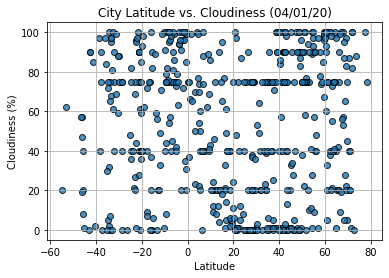

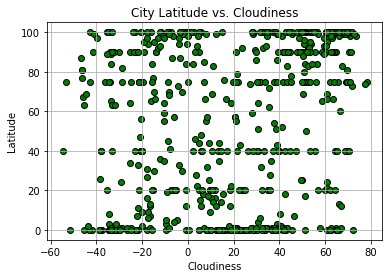

In [17]:
plt.scatter(lat,cloudiness, facecolors="green", edgecolors = "black")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

plt.show()

## Latitude vs. Wind Speed Plot

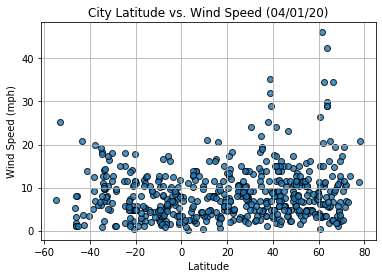

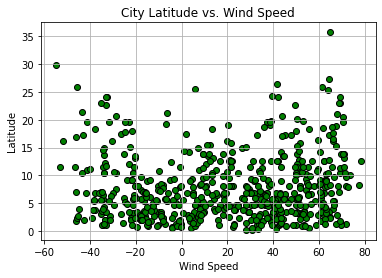

In [18]:
plt.scatter(lat,wind_speed, facecolors="green", edgecolors = "black")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

plt.show()

## Linear Regression

In [31]:
north_city = weather_df.loc[weather_df["Lat"] >= 0]
south_city = weather_df.loc[weather_df["Lat"] < 0]
south_city

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Avarua,-21.2078,-159.7750,84.20,70,20,4.61,CK,1612496904
2,Hervey Bay,-25.2986,152.8535,84.99,57,64,5.99,AU,1612497112
6,Mataura,-46.1927,168.8643,75.43,39,81,1.83,NZ,1612497113
7,Rikitea,-23.1203,-134.9692,78.91,69,100,11.97,PF,1612497113
9,Richards Bay,-28.7830,32.0377,73.71,89,82,7.61,ZA,1612497113
...,...,...,...,...,...,...,...,...,...
575,Buin,-33.7333,-70.7500,73.00,68,0,10.36,CL,1612497248
580,Vanimo,-2.6741,141.3028,83.50,77,30,7.34,PG,1612497267
581,Río Gallegos,-51.6226,-69.2181,51.80,50,0,16.11,AR,1612497267
583,Pontianak,-0.0333,109.3333,82.40,83,75,8.05,ID,1612497268


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


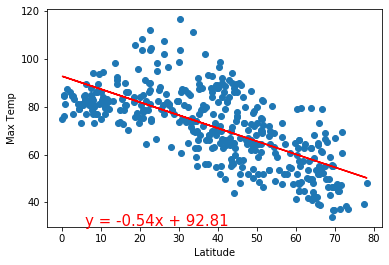

The r-squared is: 0.7714942776258608


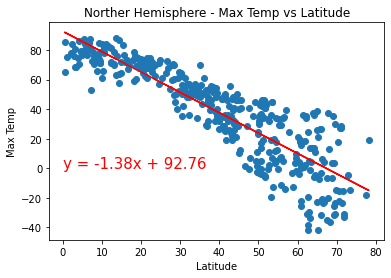

In [36]:
x_values = north_city["Lat"]
y_values = north_city["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Norther Hemisphere - Max Temp vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


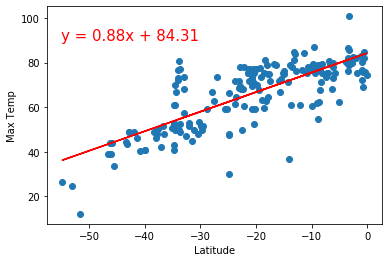

The r-squared is: 0.22536559837996173


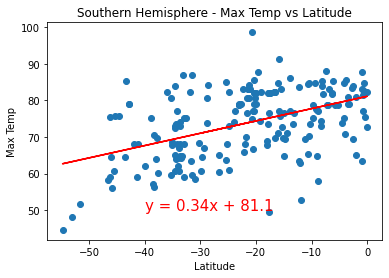

In [40]:
x_values = south_city["Lat"]
y_values = south_city["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


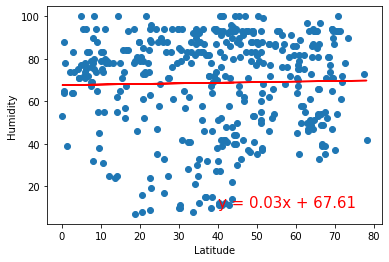

The r-squared is: 0.12531279148615246


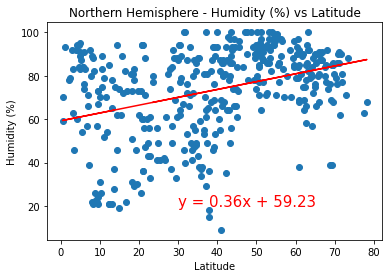

In [42]:
x_values = north_city["Lat"]
y_values = north_city["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


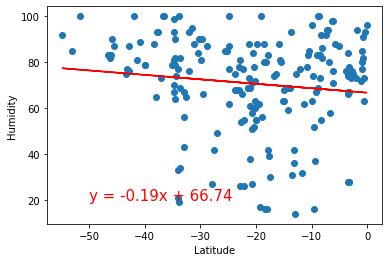

The r-squared is: 0.11822611764651474


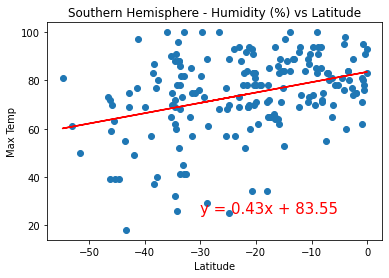

In [44]:
x_values = south_city["Lat"]
y_values = south_city["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Humidity (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


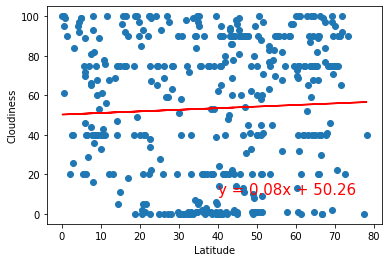

The r-squared is: 0.1568372480979201


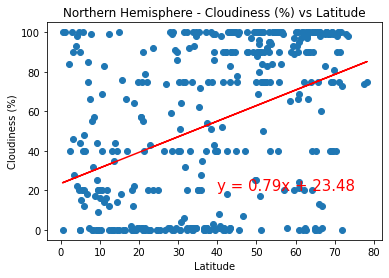

In [46]:
x_values = north_city["Lat"]
y_values = north_city["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


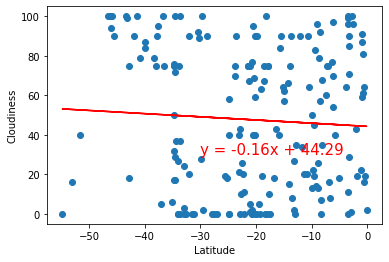

The r-squared is: 0.03620259268164965


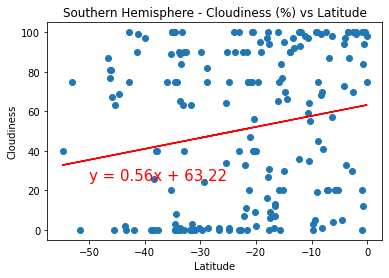

In [52]:
x_values = south_city["Lat"]
y_values = south_city["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


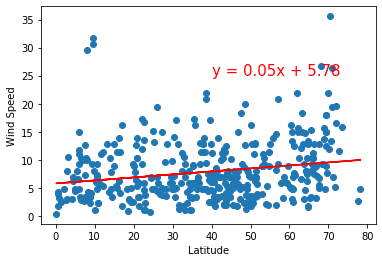

The r-squared is: 0.029180229917676385


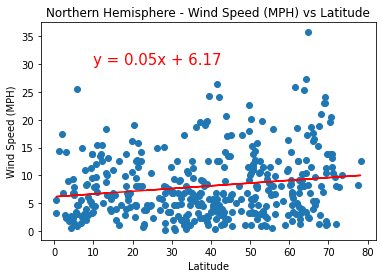

In [49]:
x_values = north_city["Lat"]
y_values = north_city["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Northern Hemisphere - Wind Speed (MPH) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


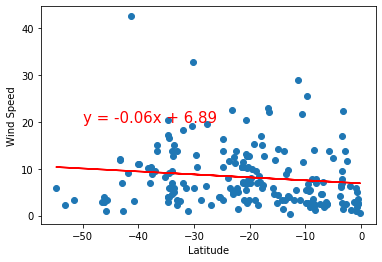

The r-squared is: 0.1247940095479529


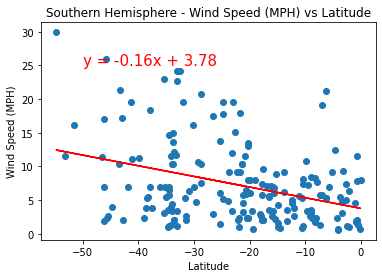

In [53]:
x_values = south_city["Lat"]
y_values = south_city["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Southern Hemisphere - Wind Speed (MPH) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()